In [1]:
import numpy as np
import os
import cv2  # For resizing images
import pydicom  # For handling DICOM files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Input,Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from keras.activations import relu,sigmoid
from keras.optimizers import Adam
from keras.losses import binary_crossentropy 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
# dataset_1
def load_dicom_images(folder_path, image_size=(128, 128)):
    images = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".dcm"):
            # Load DICOM image
            dicom_path = os.path.join(folder_path, filename)
            dicom_data = pydicom.dcmread(dicom_path)
            
            # Convert DICOM to a NumPy array
            image = dicom_data.pixel_array
            
            # Resize to a standard size
            image_resized = cv2.resize(image, image_size)
            
            # Normalize pixel values to [0, 1]
            image_normalized = image_resized / float(image_resized.max())
            
            # Append the image
            images.append(image_normalized)


    # Convert to numpy arrays
    images = np.array(images).reshape(-1, image_size[0], image_size[1], 1)  # Add channel dimension
    
    return images

In [3]:
# dataset_2
def load_png_images(folder_path, image_size=(128, 128)):
    images = []
    # Iterate through files in the directory
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpeg"):
            # Load the PNG image
            png_path = os.path.join(folder_path, filename)
            image = cv2.imread(png_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

            # Resize to a standard size
            image_resized = cv2.resize(image, image_size)

            # Normalize pixel values to [0, 1]
            image_normalized = image_resized / float(image_resized.max())  # Rescale pixel values to [0, 1]

            # Append the image
            images.append(image_normalized)

    # Convert images to numpy array and add channel dimension
    images = np.array(images).reshape(-1, image_size[0], image_size[1], 1)  # Add channel dimension

    return images

In [4]:
# Load images and labels
folder_path1 = '/MYWork/NU/ML/ML Project/Dataset'
folder_path2="/MYWork/NU/ML/ML Project/Dataset2"
images1= load_dicom_images(folder_path1)
images2= load_png_images(folder_path2)
images = np.concatenate([images1, images2], axis=0)
labels=pd.read_csv("/MYWork/NU/ML/ML Project/image_lables.csv")
labels_flattend=labels["image_labeling"].values.ravel()
labels_Encoded=LabelEncoder().fit_transform(labels_flattend).astype(int)
X_train,X_test,y_train,y_test=train_test_split(images,labels_Encoded,test_size=0.2,random_state=42)

In [6]:
print("image_train=",X_train.shape)
print("image_test=",X_test.shape)
print("lables_train=",y_train.shape)
print("lables_test=",y_test.shape)


image_train= (503, 128, 128, 1)
image_test= (126, 128, 128, 1)
lables_train= (503,)
lables_test= (126,)


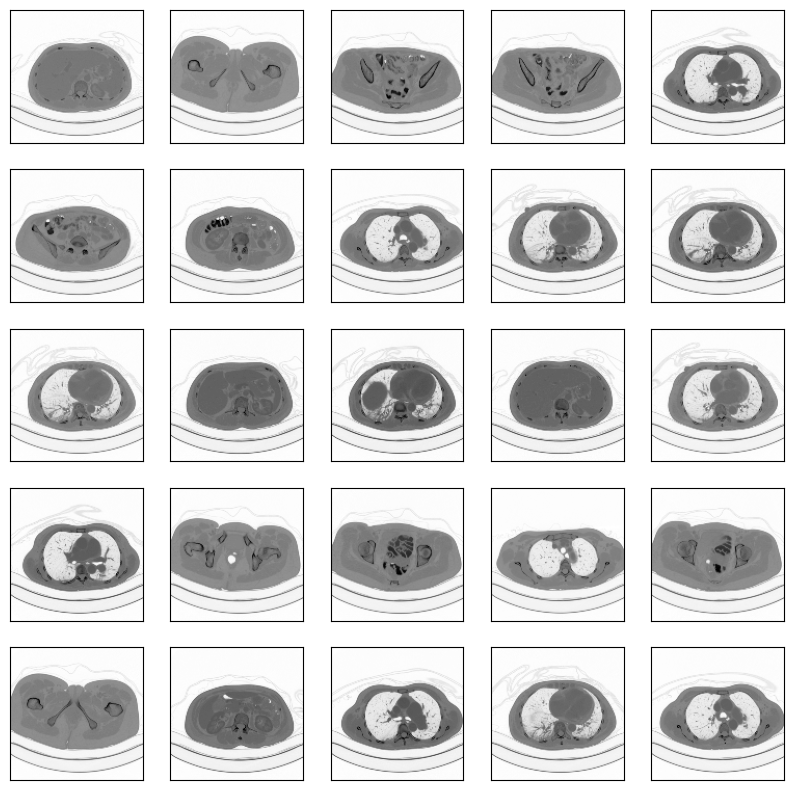

In [7]:
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)

plt.show()

In [72]:
#Ahmed
np.random.seed(42)
tf.random.set_seed(42)
def model_1():
    model_1=Sequential([
                  Input(shape=(128,128,1)),
                  Conv2D(32,(3,3),name="M1_C1",padding="same",activation=relu),
                  MaxPooling2D(pool_size=(2,2)),
                  Dropout(0.2),
                  Flatten(),
                  Dense(units=32,name="M1_L1",activation=relu),
                  Dropout(0.4),
                  Dense(units=1,name="M1_L2",activation=sigmoid)
                  
                  ],name="model_1")
    return model_1

In [73]:
# Nehad
def model_2():
    model_2 = Sequential([
                  Input(shape=(128, 128, 1)),
                  Conv2D(64, (5, 5), name="M2_C1", padding="same", activation=relu),
                  MaxPooling2D(pool_size=(3, 3)),
                  Dropout(0.3),
                  Flatten(),
                  Dense(units=32, name="M2_L1", activation=relu),
                  Dropout(0.5),
                  Dense(units=1, name="M2_L2", activation=sigmoid)
              ], name="model_2_modified")
    return model_2

In [74]:
#Omar
def model_3():
    model_3 = Sequential([
                  Input(shape=(128, 128, 1)),
                  Conv2D(128, (7, 7), name="M3_C1", padding="same", activation=relu),
                  MaxPooling2D(pool_size=(4, 4)),
                  Dropout(0.1),
                  Conv2D(64, (3, 3), name="M3_C2", padding="same", activation=relu),
                  MaxPooling2D(pool_size=(2, 2)),
                  Dropout(0.3),
                  Flatten(),
                  Dense(units=128, name="M3_L1", activation=relu),
                  Dropout(0.5),
                  Dense(units=1, name="M3_L2", activation=sigmoid)
              ], name="model_3_modified_v2")
    return model_3

In [75]:
model_1=model_1()
model_2=model_2()
model_3=model_3()
model_1.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ C1 (Conv2D)                     │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 32)             │     4,194,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,194,689 (16.00 MB)

 Trainable params: 4,194,689 (16.00 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model_2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ C1 (Conv2D)                     │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 32)             │     4,194,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,194,689 (16.00 MB)

 Trainable params: 4,194,689 (16.00 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model_3.summary()

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ C1 (Conv2D)                     │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 32)             │     4,194,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,194,689 (16.00 MB)

 Trainable params: 4,194,689 (16.00 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
estimators=[("model_1",model_1),("model_2",model_2,),("model_3",model_3)]
histories=[]
for name,model in estimators:
    model.compile(optimizer=Adam(learning_rate=0.001),loss=binary_crossentropy,metrics=["accuracy"])
    history=model.fit(X_train,y_train,batch_size=10,epochs=10,validation_data=[X_test,y_test],shuffle=False)
    histories.append(history)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    y_pred_train_binary=(y_pred_train>=0.5).astype(int)
    y_pred_test_binary=(y_pred_test>=0.5).astype(int)
    y_train_accuracy=accuracy_score(y_train,y_pred_train_binary)
    y_test_accuracy=accuracy_score(y_test,y_pred_test_binary)
    print(f"{name} train_accuracy={y_train_accuracy}")
    print(f"{name} test_accuracy={y_test_accuracy}")
    

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.5516 - loss: 0.6791 - val_accuracy: 0.5079 - val_loss: 0.8340
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.5455 - loss: 0.6850 - val_accuracy: 0.5079 - val_loss: 0.7168
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.5577 - loss: 0.6825 - val_accuracy: 0.5079 - val_loss: 0.8190
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.5894 - loss: 0.6540 - val_accuracy: 0.5238 - val_loss: 0.9159
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6027 - loss: 0.6820 - val_accuracy: 0.5238 - val_loss: 0.7414
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6048 - loss: 0.6541 - val_accuracy: 0.5079 - val_loss: 0.8066
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.5991 - loss: 0.6476 - val_accuracy: 0.5000 - val_loss: 0.7880
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.5975 - loss: 0.6305 - val_accuracy: 0.5159 - v

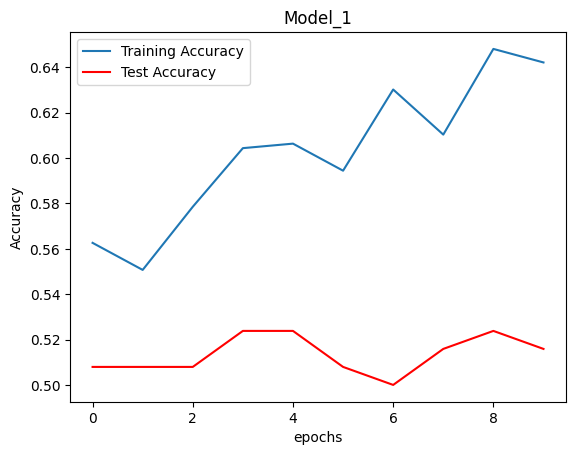

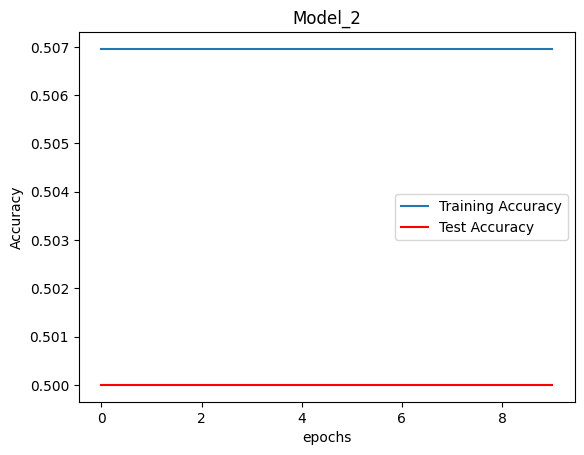

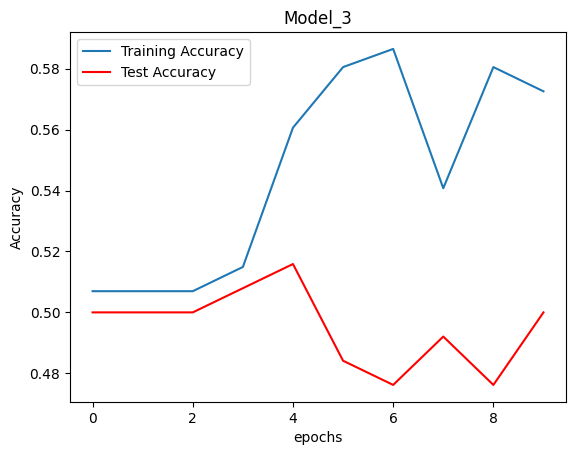

In [80]:
c=1
for model in histories:
    plt.plot(model.history["accuracy"])
    plt.plot(model.history["val_accuracy"],color="red")
    plt.legend(["Training Accuracy","Test Accuracy"])
    plt.title(f"Model_{c}")
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    plt.show()
    c+=1

In [34]:
# Wrapper for Keras models
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y, **kwargs):
        self.model.fit(X, y, **kwargs)
        return self

    def predict(self, X):
        # Convert probabilities to binary predictions
        return (self.model.predict(X) >= 0.5).astype(int).flatten()

    def predict_proba(self, X):
        # Return probabilities (needed for soft voting)
        return self.model.predict(X)

# Wrap each TensorFlow/Keras model
wrapped_estimators = [
    ("model_1", KerasClassifierWrapper(model_1)),
    ("model_2", KerasClassifierWrapper(model_2)),
    ("model_3", KerasClassifierWrapper(model_3)),
]

# Train individual models (optional, can be done within the wrapper)
for name, model in estimators:
    model.compile(optimizer=Adam(), loss=binary_crossentropy, metrics=["accuracy"])
    model.fit(X_train, y_train, batch_size=10, epochs=10, validation_data=(X_test, y_test), verbose=0)

# Create the VotingClassifier
vc = VotingClassifier(estimators=wrapped_estimators, voting="hard")

# Train the VotingClassifier
vc.fit(X_train, y_train)

# Predict with the VotingClassifier
y_pred_vc_train = vc.predict(X_train)
y_pred_vc_test = vc.predict(X_test)

# Calculate accuracies
y_vc_train_accuracy = accuracy_score(y_train, y_pred_vc_train)
y_vc_test_accuracy = accuracy_score(y_test, y_pred_vc_test)

# Print accuracies
print(f"VotingClassifier in Training Phase (hard voting): {y_vc_train_accuracy:.2f}")
print(f"VotingClassifier in Test Phase (hard voting): {y_vc_test_accuracy:.2f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.6858 - loss: 0.5811
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.5253 - loss: 0.6926
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.5266 - loss: 0.6926
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
VotingClassifier in Training Phase (hard voting): 0.51
VotingClassifier in Test Phase (hard voting): 0.50
